In [65]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [66]:
# Define parameters (example values, replace with actual parameters)
# K = np.array(K_estimated)

# Theta = np.array(Theta_estimated)

# Sigma = np.array(Sigma_estimated)

# # Initial state vector (example values)
X_t = np.array([0.00064057, 0.04026058, 0.0009015,  0.0115,     0.02779365])

# Define parameters based on the components of the table, determinant = Δ = 0.0036236564940852290998
K = np.array([
    [0.2445, 0, 0, 0, 0], 
    [0.0823, 0.1356, 0.0789, -0.1207, -0.0257], 
    [0.0378, -0.0090, 0.3177, -0.1012, -0.1533], 
    [-0.0019, 0.0542, 0.0988, 0.4265, 0.0427], 
    [0.0088, 0.0312, 0.1609, 0.0332, 0.6246]
])

Theta = np.array([0.0038, 0, 0, 0.0214, 0.0257])

Sigma = np.array([
    [0.0635, 0, 0, 0, 0], 
    [0, 0.2373, 0, 0, 0], 
    [0, 0, 0.1226, 0, 0], 
    [0, 0, 0, 0.0101, 0], 
    [0, 0, 0, 0, 0.0099]
])

# # Example initial state vector
# X_t = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Time parameters
delta_t = 1/12  # One month time step
total_years = 24
N = int(total_years * 12)  # Total number of time steps

# Function to perform Euler step
def euler_step(X_t, K, Theta, Sigma, delta_t):
    # Compute mean-reversion term
    mean_reversion = K @ (Theta - X_t) * delta_t
    
    # Generate random Brownian increments
    dZ_t = np.random.normal(size=X_t.shape)
    
    # Compute stochastic term
    vol_t = 0
    sqrt_Xi_t_values = [max(0, X_t[i]) for i in range(3)] + [1] * 2 # Example, adjust if needed
    sqrt_Xi_t = np.diag(np.sqrt(sqrt_Xi_t_values))  
    stochastic_term = Sigma @ sqrt_Xi_t @ dZ_t * np.sqrt(delta_t)
    
    # Update state
    X_t_next = X_t + mean_reversion + stochastic_term
    return X_t_next

# Simulate the process
X_simulation = np.zeros((N+1, len(X_t)))
X_simulation[0] = X_t

for t in range(1, N+1):
    X_t = euler_step(X_t, K, Theta, Sigma, delta_t)
    X_simulation[t] = X_t

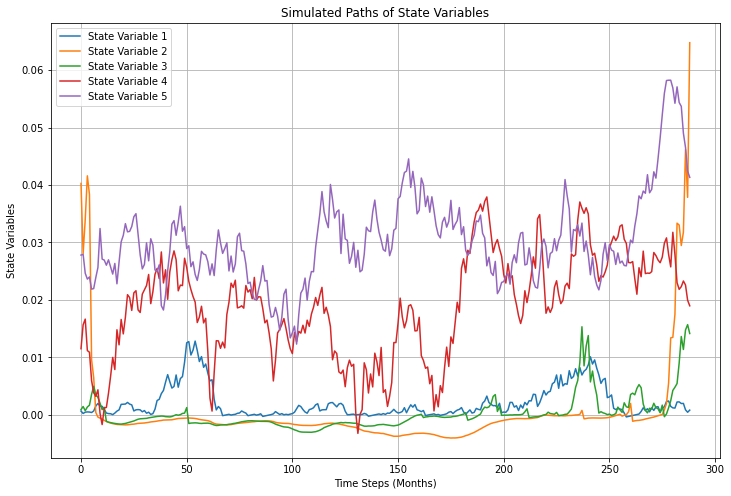

In [67]:
# Plot the simulated state variable paths
plt.figure(figsize=(12, 8))
for i in range(X_simulation.shape[1]):
    plt.plot(X_simulation[:, i], label=f'State Variable {i + 1}')

plt.xlabel('Time Steps (Months)')
plt.ylabel('State Variables')
plt.title('Simulated Paths of State Variables')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# # Number of simulations
# num_simulations = 10000

# # Simulate the process 100 times
# all_simulations = np.zeros((num_simulations, N+1, len(X_t)))

# for i in range(num_simulations):
#     X_t = np.array([0.00052817, 0., 0., 0.02779365, 0.0115])
#     X_simulation = np.zeros((N+1, len(X_t)))
#     X_simulation[0] = X_t
    
#     for t in range(1, N+1):
#         X_t = euler_step(X_t, K, Theta, Sigma, delta_t)
#         X_simulation[t] = X_t
    
#     all_simulations[i] = X_simulation

# # Calculate the mean of all simulations
# mean_paths = np.mean(all_simulations, axis=0)



In [69]:
#%store mean_paths

In [70]:
# # Plot all 100 paths and the mean for each component of X_t
# plt.figure(figsize=(20, 10))

# for j in range(len(X_t)):  # Loop through each component of X_t
#     plt.subplot(3, 2, j + 1)
#     for i in range(num_simulations):
#         plt.plot(all_simulations[i, :, j], alpha=0.2)  # Plot all paths
#     plt.plot(mean_paths[:, j], color='black', linewidth=2, label='Mean Path')  # Plot mean path
#     plt.title(f'Component {j+1}')
#     plt.xlabel('Time steps')
#     plt.ylabel(f'X_t[{j}]')
#     plt.legend()

# plt.tight_layout()
# plt.show()

# # Zoomed-in plots around the mean path
# plt.figure(figsize=(20, 10))

# zoom_margin = 0.2  # 10% margin above and below the mean path

# for j in range(len(X_t)):  # Loop through each component of X_t
#     plt.subplot(3, 2, j + 1)
#     plt.plot(mean_paths[:, j], color='black', linewidth=2, label='Mean Path')  # Plot mean path
#     plt.title(f'Zoomed-in Mean Path for Component {j+1}')
#     plt.xlabel('Time steps')
#     plt.ylabel(f'X_t[{j}]')
#     plt.legend()

# plt.tight_layout()
# plt.show()

In [71]:
# # Plot all components on a single plot
# plt.figure(figsize=(15, 10))

# colors = ['b', 'g', 'r', 'c', 'm']  # Define a color for each component

# for j in range(len(X_t)):  # Loop through each component of X_t
#     for i in range(num_simulations):
#         plt.plot(all_simulations[i, :, j], color=colors[j], alpha=0.2, label=f'Component {j+1}' if i == 0 else "")

# plt.title('Simulations of All Components')
# plt.xlabel('Time steps')
# plt.ylabel('Value')
# plt.legend(loc='upper left')
# plt.show()

In [72]:
N = 12 * 24  # time steps
paths = 20  # number of paths
# T = 10
dt = 1/12
# T_vec, dt = np.linspace(0, T, N, retstep=True)

K11 = 0.2445
theta_v = 0.0038
sigma11 = 0.0635
# std_asy = np.sqrt(theta * sigma**2 / (2 * kappa))  # asymptotic standard deviation

X0 = 0.061579 # Initial garch vol for now
X = np.zeros((N, paths))
X[0, :] = X0
W = ss.norm.rvs(loc=0, scale=np.sqrt(dt), size=(N - 1, paths))

for t in range(0, N - 1):
    X[t + 1, :] = np.abs(X[t, :] + K11 * (theta_v - X[t, :]) * dt + sigma11 * np.sqrt(X[t, :]) * W[t, :])

X_T = X[-1, :]  # values of X at time T
X_1 = X[:, 0]  # a single path

Stored 'X_1' (ndarray)


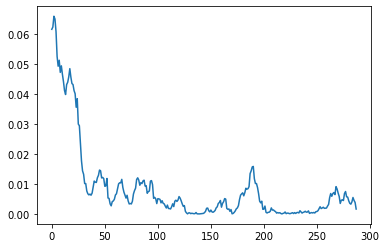

In [73]:
%store X_1
plt.plot(X_1)


---

# A and B ODEs

In [74]:
from scipy.integrate import solve_ivp

In [75]:
# Lambda1 = np.array([
#     [0, 0, 0, 0, 0],
#     [-0.0211, -0.3618, 0.0947, 0.3590, 0.0425],
#     [-0.0047, -0.0494, -0.1315, 0.8385, 1.1479],
#     [-0.0026, -0.0098, -0.0050, -0.0018, -0.0037],
#     [-0.0008, -0.0027, -0.0013, -0.0049, -0.0007]
# ])

# Lambda0 = np.array([-0.0515, -0.0278, 0.0325, 0.0001, 0.0002])

# # Define parameters (example values, adjust as necessary)
# K_tilde = K + Sigma @ Lambda1  # Mean-reversion matrix

# Sigma = np.array([
#     [0.1, 0, 0, 0, 0],
#     [0, 0.2, 0, 0, 0],
#     [0, 0, 0.15, 0, 0],
#     [0, 0, 0, 0.25, 0],
#     [0, 0, 0, 0, 0.3]
# ])  # Volatility matrix
# Theta_tilde = np.linalg.inv(K_tilde) @ (K @ Theta - Sigma @ Lambda0) # Long-run means
# alpha = np.array([0, 0, 0, 0, 0])  # Alpha constants
# beta = np.array([
#     [1, 1, 1, 1, 1],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0]
# ])  # Beta vectors
# delta_0 = 0.0296  # Constant term
# delta_1 = np.array([0, 1, 1, 0, 0])  # Delta term

# # Initial conditions
# A0 = 0
# B0 = np.zeros(5)

# # Time range
# T = 24  # years
# steps_per_year = 12  # monthly steps
# t_eval = np.linspace(0, T, T * steps_per_year)

In [76]:
# # Define ODE functions
# def dA_dt(t, A, B):
#     dA = -Theta_tilde.T @ K_tilde.T @ B + 0.5 * np.sum((Sigma.T @ B)**2 * alpha) - delta_0
#     return dA

# def dB_dt(t, B):
#     dB = -K_tilde.T @ B + 0.5 * np.sum((Sigma.T @ B)**2 * beta, axis=1) + delta_1
#     return dB

# Solve ODEs
# sol_A = solve_ivp(dA_dt, [0, T], [A0], t_eval=t_eval, args=(B0,))
# sol_B = solve_ivp(dB_dt, [0, T], B0, t_eval=t_eval)

# # Extract results
# A_tau = sol_A.y[0]
# B_tau = sol_B.y.T

# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.subplot(211)
# plt.plot(t_eval, A_tau, label='A(tau)')
# plt.xlabel('Years')
# plt.ylabel('A(tau)')
# plt.legend()
# plt.grid(True)

# plt.subplot(212)
# for i in range(B_tau.shape[1]):
#     plt.plot(t_eval, B_tau[:, i], label=f'B(tau)_{i+1}')
# plt.xlabel('Years')
# plt.ylabel('B(tau)')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

## Tau Maturities

In [77]:
%store -r K_estimated_mean
%store -r Theta_estimated_mean
%store -r Sigma_estimated_mean
%store -r delta_0_estimated_mean
%store -r lambda_0_estimated_mean
%store -r lambda_1_estimated_mean
%store -r Sigma_M_estimated_mean

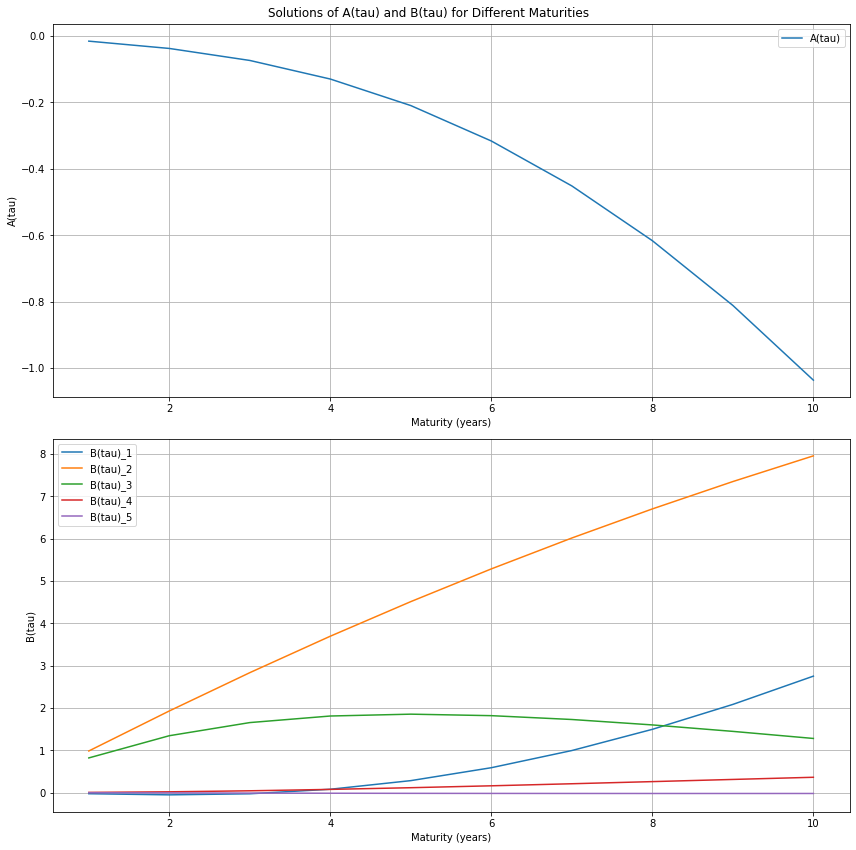

In [115]:
# Lambda1 = np.array([
#     [0, 0, 0, 0, 0],
#     [-0.0211, -0.3618, 0.0947, 0.3590, 0.0425],
#     [-0.0047, -0.0494, -0.1315, 0.8385, 1.1479],
#     [-0.0026, -0.0098, -0.0050, -0.0018, -0.0037],
#     [-0.0008, -0.0027, -0.0013, -0.0049, -0.0007]
# ])

# Lambda0 = np.array([-0.0515, -0.0278, 0.0325, 0.0001, 0.0002])

# # Define parameters (example values, adjust as necessary)
# K_tilde = K + Sigma @ Lambda1  # Mean-reversion matrix

# Sigma = np.array([
#     [0.1, 0, 0, 0, 0],
#     [0, 0.2, 0, 0, 0],
#     [0, 0, 0.15, 0, 0],
#     [0, 0, 0, 0.25, 0],
#     [0, 0, 0, 0, 0.3]
# ])  # Volatility matrix

# Theta_tilde = np.linalg.inv(K_tilde) @ (K @ Theta - Sigma @ Lambda0) # Long-run means

# alpha = np.array([0, 0, 0, 1, 1])  # Alpha constants

# beta = np.array([
#     [1, 1, 1, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0]
# ])  # Beta vectors

# delta_0 = 0.0296  # Constant term
# delta_1 = np.array([0, 1, 1, 0, 0])  # Delta term

Lambda1 = lambda_1_estimated_mean

Lambda0 = lambda_0_estimated_mean

# Define parameters (example values, adjust as necessary)
K_tilde = K + Sigma @ Lambda1  # Mean-reversion matrix

Sigma = np.diag(Sigma_estimated_mean)

Theta_tilde = np.linalg.inv(K_tilde) @ (K @ Theta - Sigma @ Lambda0) # Long-run means

alpha = np.array([0, 0, 0, 1, 1])  # Alpha constants

beta = np.array([
    [1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])  # Beta vectors

delta_0 = delta_0_estimated_mean  # Constant term
delta_1 = np.array([0, 1, 1, 0, 0])  # Delta term

# Time range
T = 24  # years
steps_per_year = 12  # monthly steps
t_eval = np.linspace(0, T, T * steps_per_year)

# Define maturities (1 to 10 years)
maturities = np.arange(1, 11)

# Define the Euler scheme time step (monthly)
dt = 1 / 12
steps_per_year = int(1 / dt)

# Storage for solutions
A_tau = []
B_tau = []

# Initial conditions
A0 = 0
B0 = np.zeros(5)

# Define ODE functions
def dA_dt(t, A, B):
    dA = -Theta_tilde.T @ K_tilde.T @ B + 0.5 * np.sum((Sigma.T @ B)**2 * alpha) - delta_0
    return dA

def dB_dt(t, B):
    dB = -K_tilde.T @ B + 0.5 * np.sum((Sigma.T @ B)**2 * beta, axis=1) + delta_1
    return dB

# Solve ODEs for each maturity
for tau in maturities:
    t_eval = np.linspace(0, tau, tau * steps_per_year)

    # Solve ODE for B(tau)
    sol_B = solve_ivp(dB_dt, [0, tau], B0, t_eval=t_eval)
    # Solve ODE for A(tau)
    sol_A = solve_ivp(lambda t, A: dA_dt(t, A, sol_B.y[:, -1]), [0, tau], [A0], t_eval=t_eval)
    
       
    # Store results for the current maturity
    A_tau.append(sol_A.y[0][-1])
    B_tau.append(sol_B.y[:, -1])

# Convert lists to arrays for plotting
A_tau = np.array(A_tau)
B_tau = np.array(B_tau)

# Plot the results
plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.plot(maturities, A_tau, label='A(tau)')
plt.xlabel('Maturity (years)')
plt.ylabel('A(tau)')
plt.legend()
plt.grid(True)

plt.subplot(212)
for i in range(B_tau.shape[1]):
    plt.plot(maturities, B_tau[:, i], label=f'B(tau)_{i+1}')
plt.xlabel('Maturity (years)')
plt.ylabel('B(tau)')
plt.legend()
plt.grid(True)

plt.suptitle('Solutions of A(tau) and B(tau) for Different Maturities')
plt.tight_layout()
plt.show()


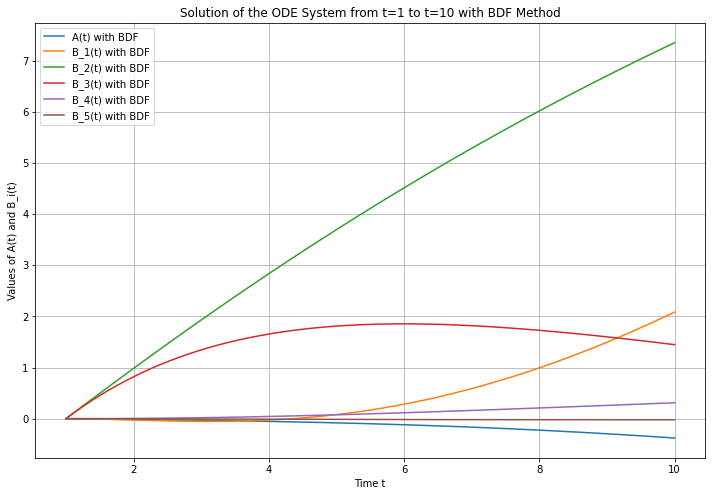

In [110]:
Sigma = np.diag(Sigma_estimated_mean)

Lambda1 = lambda_1_estimated_mean

Lambda0 = lambda_0_estimated_mean

K = K_estimated_mean

Theta = Theta_estimated_mean

# Define parameters (example values, adjust as necessary)
K_tilde = K + Sigma @ Lambda1  # Mean-reversion matrix

Theta_tilde = np.linalg.inv(K_tilde) @ (K @ Theta - Sigma @ Lambda0) # Long-run means

alpha = np.array([0, 0, 0, 1, 1])  # Alpha constants

beta = np.array([
    [1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])  # Beta vectors

delta_0 = delta_0_estimated_mean  # Constant term
delta_1 = np.array([0, 1, 1, 0, 0])  # Delta term

# Define the ODE system
def ode_system(t, y):
    A = y[0]
    B = y[1:6]
    dA = -Theta_tilde.T @ K_tilde.T @ B + 0.5 * np.sum((Sigma.T @ B)**2 * alpha) - delta_0
    dB = -K_tilde.T @ B + 0.5 * np.sum((Sigma.T @ B)**2 * beta, axis=1) + delta_1
    return np.concatenate(([dA], dB))

# Initial conditions
y0 = np.zeros(6)  # A(0) = 0, B(0) = 0

# Time span from 1 to 10
t_span = (1, 10)
t_eval = np.linspace(1, 10, 500)

# Solve the ODE system using the 'BDF' method
sol_bdf = solve_ivp(ode_system, t_span, y0, t_eval=t_eval, method='BDF')

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(sol_bdf.t, sol_bdf.y[0], label="A(t) with BDF")
for i in range(5):
    plt.plot(sol_bdf.t, sol_bdf.y[i+1], label=f"B_{i+1}(t) with BDF")

plt.xlabel("Time t")
plt.ylabel("Values of A(t) and B_i(t)")
plt.title("Solution of the ODE System from t=1 to t=10 with BDF Method")
plt.legend()
plt.grid(True)
plt.show()


In [108]:
# print(A_tau)
# print(B_tau)
print(K)
print(Theta)
print(Sigma)
print(Lambda0)
print(Lambda1)
print(delta_0)
print(delta_1)


# %store A_tau
# %store B_tau

[[ 0.26105497  0.          0.          0.          0.        ]
 [ 0.06847049  0.14360735  0.06659055 -0.12798303 -0.02565705]
 [ 0.04027544 -0.01532732  0.31919399 -0.089462   -0.14138327]
 [-0.00093843  0.03901037  0.10180955  0.42494097  0.04359767]
 [ 0.0157396   0.0139988   0.17290211  0.04445191  0.6369382 ]]
[0.01568334 0.         0.         0.0169683  0.03082309]
[ 0.07036196  0.2405432   0.13346726  0.00449129 -0.00780249]
[-0.04944711 -0.04943789  0.04613974 -0.01185059 -0.02828328]
[[ 0.          0.          0.          0.          0.        ]
 [-0.07765535 -0.37431781  0.11332015  0.41089084  0.09927411]
 [-0.02848725 -0.05129498 -0.09383471  0.83387095  1.12558196]
 [ 0.00321467 -0.04438814 -0.05904993  0.02877747 -0.00322598]
 [ 0.0131741   0.01557585 -0.00428232 -0.0211157   0.0028874 ]]
0.015100884395606258
[0 1 1 0 0]


### Calculating V_t (Equation 9)

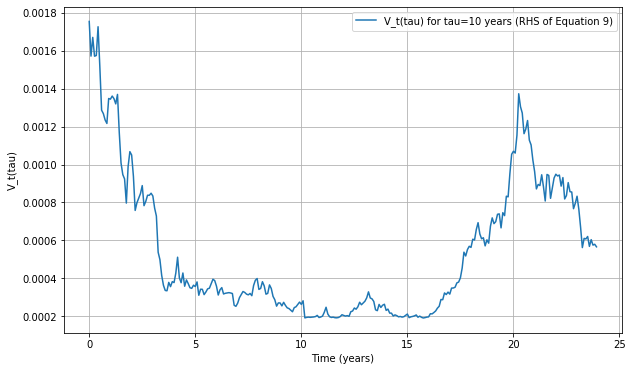

Stored 'V_t_tau' (ndarray)


In [59]:
# Compute V_t(tau) for a given tau
def compute_V_t_tau(tau, Sigma, X_t, B_tau):
    b_tau = B_tau / tau  # b(tau)
    Xi_t = np.diag([X_t, X_t, X_t, 1, 1])  # Xi_t matrix, reflecting the variance structure
    V_t_tau = b_tau.T @ Sigma @ Xi_t @ Sigma.T @ b_tau
    return V_t_tau

# Select a specific maturity
tau = 10

# Calculate V_t(tau) for each time point
V_t_tau = np.zeros(len(X_1))
for t in range(len(X_1)):
    V_t_tau[t] = compute_V_t_tau(tau, Sigma, X_1[t], B_tau[tau-1])

# Plot V_t(tau)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(X_1)) * dt, V_t_tau, label=f'V_t(tau) for tau={tau} years (RHS of Equation 9)')
plt.xlabel('Time (years)')
plt.ylabel('V_t(tau)')
plt.legend()
plt.grid(True)
plt.show()

%store V_t_tau


# Kalman

## Data

### Monthly Yields

In [3]:
data_file_path = "Data_v2_2024.06.11 - Copy.xlsx"
df1 = pd.read_excel(data_file_path, sheet_name=0, header=[2])
df1

,Security,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,G0025Z 1Y BLC2 Curncy,G0025Z 2Y BLC2 Curncy,G0025Z 3Y BLC2 Curncy,G0025Z 4Y BLC2 Curncy,G0025Z 5Y BLC2 Curncy,G0025Z 6Y BLC2 Curncy,G0025Z 7Y BLC2 Curncy,G0025Z 8Y BLC2 Curncy,G0025Z 9Y BLC2 Curncy,G0025Z 10Y BLC2 Curncy
0,2000-01-31,4.238960,4.581320,4.866830,5.100040,5.282600,5.382660,5.530220,5.645347,5.699073,...,6.18476,6.48765,6.53810,6.56334,6.57418,6.56785,6.56332,6.55993,6.55728,6.53920
1,2000-02-29,4.252000,4.606800,4.903550,5.110700,5.225400,5.375800,5.509000,5.607400,5.684600,...,6.16679,6.42546,6.46163,6.47975,6.46495,6.40220,6.35736,6.32365,6.29751,6.27536
2,2000-03-31,4.339390,4.553780,4.761170,4.924760,5.054000,5.172990,5.273080,5.338053,5.390427,...,6.17866,6.38049,6.27461,6.22156,6.15213,6.05292,5.98204,5.92875,5.88742,5.85431
3,2000-04-30,4.540180,4.740860,4.936740,5.090620,5.191950,5.298580,5.371760,5.430173,5.469287,...,6.21918,6.57470,6.48300,6.43619,6.35882,6.25681,6.18393,6.12913,6.08664,6.04973
4,2000-05-31,4.962170,5.074440,5.176510,5.244980,5.285900,5.348670,5.394540,5.425560,5.440080,...,6.28279,6.57080,6.47788,6.43132,6.39944,6.30497,6.23747,6.18672,6.14737,6.11016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2023-12-31,3.095112,2.595478,2.412045,2.381430,2.420318,2.487021,2.561340,2.633996,2.701132,...,4.69980,4.19258,3.94495,3.84819,3.78999,3.81342,3.83045,3.82971,3.82906,3.83819
288,2024-01-31,3.154288,2.681122,2.509892,2.485573,2.528428,2.598203,2.675209,2.750312,2.819672,...,4.62930,4.14849,3.91996,3.83131,3.77799,3.80722,3.82811,3.84705,3.86181,3.88986
289,2024-02-29,3.418721,3.072456,2.910273,2.850803,2.847246,2.872776,2.912160,2.956870,3.002245,...,4.91531,4.55793,4.34527,4.24158,4.17957,4.19997,4.21455,4.20539,4.19830,4.19519
290,2024-03-31,3.331061,2.956507,2.786714,2.727692,2.726971,2.755403,2.796972,2.843034,2.889049,...,4.95361,4.56283,4.34338,4.22174,4.14900,4.15017,4.15124,4.14767,4.14489,4.15021


In [4]:
# Define the maturity labels and country codes
maturity_labels = ['1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y']
country_codes = ['EA'] + ['DE', 'FR', 'NL', 'AT', 'FI', 'BE', 'IT', 'ES', 'PT', 'GB', 'US']

# Rename the unnamed columns for the Euro Area
for i in range(1, 11):
    df1.rename(columns={f'Unnamed: {i}': f'EA_{maturity_labels[i-1]}'}, inplace=True)

# Create a mapping for the other columns
column_mapping = {
    'GDBR1 Index': 'DE_1Y', 'GDBR2 Index': 'DE_2Y', 'GDBR3 Index': 'DE_3Y', 'GDBR4 Index': 'DE_4Y', 'GDBR5 Index': 'DE_5Y',
    'GDBR6 Index': 'DE_6Y', 'GDBR7 Index': 'DE_7Y', 'GDBR8 Index': 'DE_8Y', 'GDBR9 Index': 'DE_9Y', 'GDBR10 Index': 'DE_10Y',
    'GTFRF1Y Govt': 'FR_1Y', 'GTFRF2Y Govt': 'FR_2Y', 'GTFRF3Y Govt': 'FR_3Y', 'GTFRF4Y Govt': 'FR_4Y', 'GTFRF5Y Govt': 'FR_5Y',
    'GTFRF6Y Govt': 'FR_6Y', 'GTFRF7Y Govt': 'FR_7Y', 'GTFRF8Y Govt': 'FR_8Y', 'GTFRF9Y Govt': 'FR_9Y', 'GTFRF10Y Govt': 'FR_10Y',
    'GTBN1Y  Index': 'NL_1Y', 'GTNLG2Y Govt': 'NL_2Y', 'GTNLG3Y Govt': 'NL_3Y', 'GTNLG4Y Govt': 'NL_4Y', 'GTNLG5Y Govt': 'NL_5Y',
    'GTNLG6Y Govt': 'NL_6Y', 'GTNLG7Y Govt': 'NL_7Y', 'GTNLG8Y Govt': 'NL_8Y', 'GTNLG9Y Govt': 'NL_9Y', 'GTNLG10Y Govt': 'NL_10Y',
    'GTATS1Y Govt': 'AT_1Y', 'GTATS2Y Govt': 'AT_2Y', 'GTATS3Y Govt': 'AT_3Y', 'GTATS4Y Govt': 'AT_4Y', 'GTATS5Y Govt': 'AT_5Y',
    'GTATS6Y Govt': 'AT_6Y', 'GTATS7Y Govt': 'AT_7Y', 'GTATS8Y Govt': 'AT_8Y', 'GTATS9Y Govt': 'AT_9Y', 'GTATS10Y Govt': 'AT_10Y',
    'GTFIM1Y Govt': 'FI_1Y', 'GTFIM2Y Govt': 'FI_2Y', 'GTFIM3Y Govt': 'FI_3Y', 'GTFIM4Y Govt': 'FI_4Y', 'GTFIM5Y Govt': 'FI_5Y',
    'GTFIM6Y Govt': 'FI_6Y', 'GTFIM7Y Govt': 'FI_7Y', 'GTFIM8Y Govt': 'FI_8Y', 'GTFIM9Y Govt': 'FI_9Y', 'GTFIM10Y Govt': 'FI_10Y',
    'GTBEF1Y Govt': 'BE_1Y', 'GTBEF2Y Govt': 'BE_2Y', 'GTBEF3Y Govt': 'BE_3Y', 'GTBEF4Y Govt': 'BE_4Y', 'GTBEF5Y Govt': 'BE_5Y',
    'GTBEF6Y Govt': 'BE_6Y', 'GTBEF7Y Govt': 'BE_7Y', 'GTBEF8Y Govt': 'BE_8Y', 'GTBEF9Y Govt': 'BE_9Y', 'GTBEF10Y Govt': 'BE_10Y',
    'GTITL1YR Corp': 'IT_1Y', 'GBTPGR2 Index': 'IT_2Y', 'GBTPGR3 Index': 'IT_3Y', 'GBTPGR4 Index': 'IT_4Y', 'GBTPGR5 Index': 'IT_5Y',
    'GBTPGR6 Index': 'IT_6Y', 'GBTPGR7 Index': 'IT_7Y', 'GBTPGR8 Index': 'IT_8Y', 'GBTPGR9 Index': 'IT_9Y', 'GBTPGR10 Index': 'IT_10Y',
    'GTESP1Y Govt': 'ES_1Y', 'GTESP2Y Govt': 'ES_2Y', 'GTESP3Y Govt': 'ES_3Y', 'GTESP4Y Govt': 'ES_4Y', 'GTESP5Y Govt': 'ES_5Y',
    'GTESP6Y Govt': 'ES_6Y', 'GTESP7Y Govt': 'ES_7Y', 'GTESP8Y Govt': 'ES_8Y', 'GTESP9Y Govt': 'ES_9Y', 'GTESP10Y Govt': 'ES_10Y',
    'GTPTE1YR Corp': 'PT_1Y', 'GTPTE2Y Govt': 'PT_2Y', 'GTPTE3Y Govt': 'PT_3Y', 'GTPTE4Y Govt': 'PT_4Y', 'GTPTE5Y Govt': 'PT_5Y',
    'GTPTE6Y Govt': 'PT_6Y', 'GTPTE7Y Govt': 'PT_7Y', 'GTPTE8Y Govt': 'PT_8Y', 'GTPTE9Y Govt': 'PT_9Y', 'GTPTE10Y Govt': 'PT_10Y',
    'GIGB1YR Index': 'GB_1Y', 'GIGB2YR Index': 'GB_2Y', 'GIGB3YR Index': 'GB_3Y', 'GIGB4YR Index': 'GB_4Y', 'GIGB5YR Index': 'GB_5Y',
    'GIGB6YR Index': 'GB_6Y', 'GIGB7YR Index': 'GB_7Y', 'GIGB8YR Index': 'GB_8Y', 'GIGB9YR Index': 'GB_9Y', 'GIGB10YR Index': 'GB_10Y',
    'G0025Z 1Y BLC2 Curncy': 'US_1Y', 'G0025Z 2Y BLC2 Curncy': 'US_2Y', 'G0025Z 3Y BLC2 Curncy': 'US_3Y', 'G0025Z 4Y BLC2 Curncy': 'US_4Y',
    'G0025Z 5Y BLC2 Curncy': 'US_5Y', 'G0025Z 6Y BLC2 Curncy': 'US_6Y', 'G0025Z 7Y BLC2 Curncy': 'US_7Y', 'G0025Z 8Y BLC2 Curncy': 'US_8Y',
    'G0025Z 9Y BLC2 Curncy': 'US_9Y', 'G0025Z 10Y BLC2 Curncy': 'US_10Y'
}

# Rename the columns based on the mapping
df1.rename(columns=column_mapping, inplace=True)
df1['Security'] = pd.to_datetime(df1['Security'])
df1.set_index('Security', inplace=True)


In [5]:
EA_10Y_mth_yields = df1['EA_10Y'].to_numpy()
EA_10Y_mth_yields
%store EA_10Y_mth_yields

Stored 'EA_10Y_mth_yields' (ndarray)


### Monthly Volatilities from Daily Yields

In [63]:
# EA10YR Avg Data
file_path = "ECB_10YR_combined_average_yield_per_day.xlsx"
df = pd.read_excel(file_path)
df.set_index('Date', inplace=True)
# Clean the index to ensure all values are valid dates
df.index = pd.to_datetime(df.index)
df

,Average 10Y Bond Yield (10 EU Countries)
Date,
2000-01-03,5.652600
2000-01-04,5.661000
2000-01-05,5.698900
2000-01-06,5.742900
2000-01-07,5.639600
...,...
2024-06-03,3.160845
2024-06-04,3.090801
2024-06-05,3.075257


In [64]:
ea10yr_daily_yeilds = df['Average 10Y Bond Yield (10 EU Countries)'].to_numpy()
ea10yr_daily_yeilds

array([5.6526  , 5.661   , 5.6989  , ..., 3.075257, 3.132258, 3.197658])

In [65]:
EA_results_std = []
EA_data = df['Average 10Y Bond Yield (10 EU Countries)'].dropna().astype(float)
# Calculate the mean yield
EA_avg_yield = EA_data.mean()  # Mean yield, not in percentage terms
# Calculate the monthly standard deviation of daily yields
EA_monthly_vol_std = EA_data.resample('M').std()  # Monthly standard deviation
# Append results for each date
for date in EA_monthly_vol_std.index:
    EA_results_std.append([date, EA_monthly_vol_std.loc[date]])

EA_vol_df_std = pd.DataFrame(EA_results_std, columns=['Date', 'Standard_Deviation'])
EA_vol_df_std

,Date,Standard_Deviation
0,2000-01-31,0.064057
1,2000-02-29,0.060294
2,2000-03-31,0.098366
3,2000-04-30,0.057539
4,2000-05-31,0.074932
...,...,...
289,2024-02-29,0.052878
290,2024-03-31,0.055082
291,2024-04-30,0.070119
292,2024-05-31,0.061983


In [66]:
EA_vol_std = EA_vol_df_std['Standard_Deviation']
EA_vol_std

0      0.064057
1      0.060294
2      0.098366
3      0.057539
4      0.074932
         ...   
289    0.052878
290    0.055082
291    0.070119
292    0.061983
293    0.050145
Name: Standard_Deviation, Length: 294, dtype: float64

In [19]:
%store -r EA_vol_df_garch
EA_vol_df_garch

,Date,GARCH Volatility
0,2000-01-31,0.000528
1,2000-02-29,0.000649
2,2000-03-31,0.000432
3,2000-04-30,0.000991
4,2000-05-31,0.001309
...,...,...
289,2024-02-29,0.000285
290,2024-03-31,0.000352
291,2024-04-30,0.000756
292,2024-05-31,0.001581


### HICP & GDP

In [6]:

SPF_HICP = pd.read_excel(data_file_path, sheet_name=3, skiprows=14)
# Drop columns beyond the 10th one
SPF_HICP = SPF_HICP.drop(columns=['TIME PERIOD'])
SPF_HICP['DATE'] = pd.to_datetime(SPF_HICP['DATE'])
SPF_HICP

,DATE,Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins (SPF.M.U2.HICP.POINT.P12M.Q.AVG)
0,1999-12-31,1.15
1,2000-03-31,1.46
2,2000-06-30,1.49
3,2000-09-30,1.52
4,2000-12-31,1.64
...,...,...
97,2024-03-31,2.81
98,2024-06-30,2.79
99,2024-09-30,2.48
100,2024-12-31,2.27


In [7]:
HICP = SPF_HICP['Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins (SPF.M.U2.HICP.POINT.P12M.Q.AVG)']
HICP

0      1.15
1      1.46
2      1.49
3      1.52
4      1.64
       ... 
97     2.81
98     2.79
99     2.48
100    2.27
101    2.07
Name: Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins (SPF.M.U2.HICP.POINT.P12M.Q.AVG), Length: 102, dtype: float64

In [8]:
SPF_GDP = pd.read_excel(data_file_path, sheet_name=4, skiprows=4)
SPF_GDP = SPF_GDP.drop(columns=[r"Period\Unit:",	'[Percent per annum ]',	'[Percent per annum ].1','Unnamed: 3','Unnamed: 4'], axis=1)
SPF_GDP = SPF_GDP.rename(columns={"Unnamed: 5": "Period", "Unnamed: 6": "9M Ahead", "Unnamed: 7": "21M Ahead", "Unnamed: 8": "12M Ahead Inferred"})
SPF_GDP

,Period,9M Ahead,21M Ahead,12M Ahead Inferred
0,1999Q1,2.06,2.50,2.307267
1,1999Q2,2.23,2.54,2.404259
2,1999Q3,2.42,2.67,2.560550
3,1999Q4,2.83,2.74,2.779365
4,2000Q1,3.06,2.86,2.947452
...,...,...,...,...
101,2024Q2,1.00,1.38,1.213574
102,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN


In [9]:
GDP = SPF_GDP['12M Ahead Inferred'][:102]
GDP

0      2.307267
1      2.404259
2      2.560550
3      2.779365
4      2.947452
         ...   
97     1.058761
98     1.156558
99     1.079220
100    1.047545
101    1.213574
Name: 12M Ahead Inferred, Length: 102, dtype: float64

c:\Users\admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


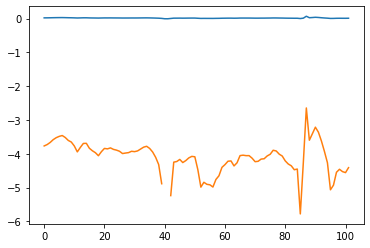

In [14]:
plt.plot(GDP/100)
plt.plot(np.log(GDP/100))

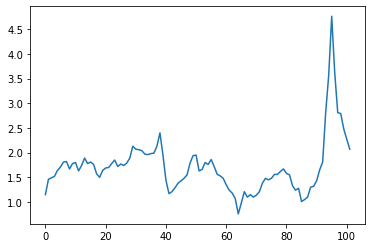

In [11]:
plt.plot(HICP)

---

## A_M and B_M

In [72]:
# Combine HICP and GDP
df_vertical = pd.DataFrame(np.stack((HICP, GDP), axis=1), columns=['HICP', 'GDP'])
df_vertical[df_vertical['GDP'] < 0]

,HICP,GDP
40,1.44,-0.292501
41,1.17,-0.359160


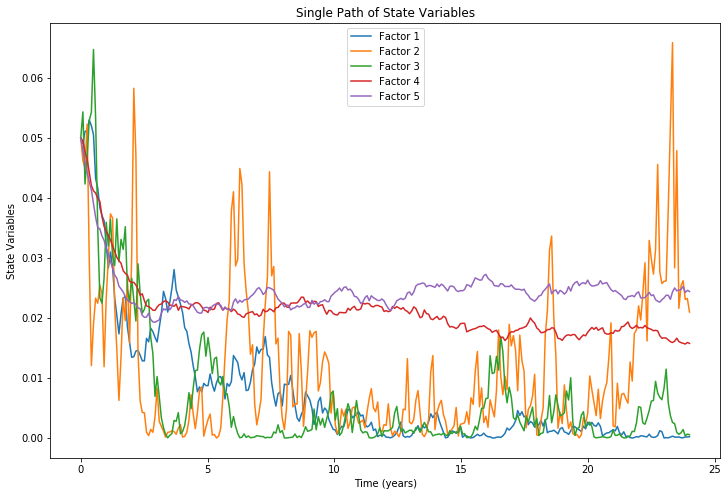

In [73]:
def simulate_X_t(K, Theta, Sigma, X0, dt, num_paths=20):
    N = 12 * 24
    num_factors = len(X0)
    X = np.zeros((N, num_factors, num_paths))
    X[0, :, :] = X0.reshape(-1, 1)

    W = ss.norm.rvs(loc=0, scale=np.sqrt(dt), size=(N - 1, num_factors, num_paths))

    for t in range(N - 1):
        sqrt_X = np.sqrt(X[t, :, :])
        dX = K @ (Theta.reshape(-1, 1) - X[t, :, :]) * dt + Sigma @ (sqrt_X * W[t, :, :])
        X[t + 1, :, :] = np.abs(X[t, :, :] + dX)

    X_T = X[-1, :, :]  # values of X at time T
    X_1 = X[:, :, 0]  # a single path

    return X, X_T, X_1

# Define parameters
K = np.array([
    [0.2445, 0, 0, 0, 0], 
    [0.0823, 0.1356, 0.0789, -0.1207, -0.0257], 
    [0.0378, -0.0090, 0.3177, -0.1012, -0.1533], 
    [-0.0019, 0.0542, 0.0988, 0.4265, 0.0427], 
    [0.0088, 0.0312, 0.1609, 0.0332, 0.6246]
])

Theta = np.array([0.0038, 0, 0, 0.0214, 0.0257])

Sigma = np.array([
    [0.0635, 0, 0, 0, 0], 
    [0, 0.2373, 0, 0, 0], 
    [0, 0, 0.1226, 0, 0], 
    [0, 0, 0, 0.0101, 0], 
    [0, 0, 0, 0, 0.0099]
])

# Initial state
X0 = np.array([0.05, 0.05, 0.05, 0.05, 0.05])

# Simulation parameters
T = 24  # 24 years
dt = 1/12  # Monthly time steps
num_paths = 20  # Number of paths

# Simulate X_t
X, XT, X1 = simulate_X_t(K, Theta, Sigma, X0, dt, num_paths)

# Example: Plot a single path for each factor
time_points = np.linspace(0, T, int(T / dt))

plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):
    plt.plot(time_points, X1[:, i], label=f'Factor {i+1}')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('State Variables')
plt.title('Single Path of State Variables')
plt.show()


In [74]:
import scipy.linalg

# Compute B_M(tau) and A_M(tau)
def compute_BM_AM(tau, K, Sigma_M, Theta):
    # Gamma_M matrix as defined in the paper
    Gamma_M = np.array([
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]
    ])
    iota = np.array([1, 1])
    # Compute B_M(tau)
    exp_term = scipy.linalg.expm(-K * tau)
    I = np.eye(K.shape[0])
    BM_tau = Gamma_M @ np.linalg.inv(K) @ (I - exp_term)

    AM_tau = (-0.5 * Sigma_M @ Sigma_M.T @ iota * tau) + ((tau * Gamma_M - BM_tau) @ Theta)

    return BM_tau, AM_tau

# Define Sigma_M from Table 3
Sigma_M = np.array([
    [0.0019, 0],
    [0, 0.0061]
])

# Define tau as 1 year
tau = 1

# Compute B_M and A_M
BM_tau, AM_tau = compute_BM_AM(tau, K, Sigma_M, Theta)

print("B_M(tau):", BM_tau)
print("A_M(tau):", AM_tau)


B_M(tau): [[ 0.00189199 -0.02246577 -0.03719431  0.81220869 -0.01707241]
 [-0.00224106 -0.01211881 -0.05837201 -0.01415582  0.74103338]]
A_M(tau): [0.0044485  0.00694829]


c:\Users\Kian\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


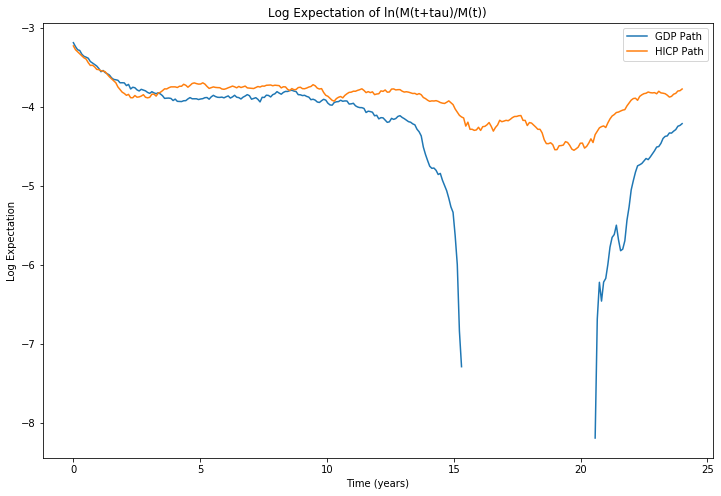

In [75]:
# Compute the expectation for each path
expectations = np.zeros((X.shape[0], X.shape[2], 2))
for t in range(X.shape[0]):
    for p in range(X.shape[2]):
        expectations[t, p, :] = AM_tau + BM_tau @ X[t, :, p]

# Plot the expectations
plt.figure(figsize=(12, 8))
plt.plot(time_points, np.log(expectations[:, p, 0]), label=f'GDP Path')
plt.plot(time_points, np.log(expectations[:, p, 1]), label=f'HICP Path')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Log Expectation')
plt.title('Log Expectation of ln(M(t+tau)/M(t))')
plt.show()

In [76]:
df_vertical.columns.values

array(['HICP', 'GDP'], dtype=object)

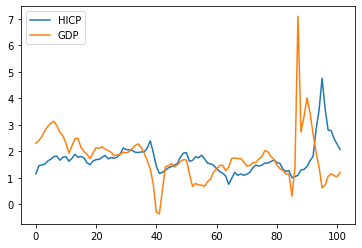

In [77]:
fig, ax = plt.subplots()
#plt.yscale('symlog')
df_vertical.plot(ax=ax)
ax.legend()

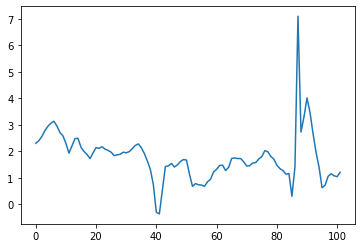

In [17]:
plt.plot(GDP.values)

In [ ]:
GDP__ = GDP.values

---

In [78]:
# from filterpy.kalman import UnscentedKalmanFilter as UKF
# from filterpy.kalman import MerweScaledSigmaPoints
# from scipy.optimize import minimize

In [79]:
# # Define the state transition function
# def state_transition_function(X, dt):
#     K = np.array([
#     [0.2445, 0, 0, 0, 0], 
#     [0.0823, 0.1356, 0.0789, -0.1207, -0.0257], 
#     [0.0378, -0.0090, 0.3177, -0.1012, -0.1533], 
#     [-0.0019, 0.0542, 0.0988, 0.4265, 0.0427], 
#     [0.0088, 0.0312, 0.1609, 0.0332, 0.6246]
#     ])

#     Theta = np.array([0.0038, 0, 0, 0.0214, 0.0257])

#     Sigma = np.array([
#         [0.0635, 0, 0, 0, 0], 
#         [0, 0.2373, 0, 0, 0], 
#         [0, 0, 0.1226, 0, 0], 
#         [0, 0, 0, 0.0101, 0], 
#         [0, 0, 0, 0, 0.0099]
#     ])
#     # Ensure no negative values for sqrt
#     sqrt_Xi_t_values = [max(0, X[i]) for i in range(3)] + [1] * 2
#     Xi_t = np.diag(np.sqrt(sqrt_Xi_t_values))

#     # Generate random noise vector
#     dZ_t = np.random.normal(size=5)

#     # Compute the state change
#     dX_t = K @ (Theta - X) * dt + Sigma @ Xi_t @ dZ_t

#     # Ensure no NaN or inf values
#     dX_t = np.nan_to_num(dX_t, nan=0.0, posinf=0.0, neginf=0.0)

#     return X + dX_t * dt

# # Define the measurement function
# def measurement_function(X):
#     a_tau = np.array([0.1] * 5)  # Example values
#     b_tau = np.eye(5)  # Example values
#     return a_tau + b_tau @ X

# # Define the initial state and covariance
# X0 = np.array([0.02, 0.03, 0.01, 0.015, 0.025])
# P0 = np.eye(5) * 0.1

# # Define the process and measurement noise covariances
# Q = np.eye(5) * 0.01
# R = np.eye(5) * 0.05

# # Define the sigma points
# points = MerweScaledSigmaPoints(n=5, alpha=0.1, beta=2., kappa=0)

# # Initialize the UKF
# ukf = UKF(dim_x=5, dim_z=5, fx=state_transition_function, hx=measurement_function, dt=1/12, points=points)
# ukf.x = X0
# ukf.P = P0
# ukf.Q = Q
# ukf.R = R

# # Example observations (yields, GDP growth, inflation)
# observations = np.array(ea10yr_daily_yeilds[0:100])
# # observations = np.array([
# #     [0.05, 0.03, 0.02, 0.015, 0.025],
# #     [0.051, 0.031, 0.021, 0.016, 0.026],
# #     # Add more observations here
# # ])

# # Run the filter
# for z in observations:
#     ukf.predict()
#     ukf.update(z)

# # Print the estimated state
# print("Estimated State:", ukf.x)


---

### Following Exact Paper Methods for Parameter Estimation

In [16]:
EA_vol_df_garch

NameError: name 'EA_vol_df_garch' is not defined

In [20]:
# Example datasets
dates_yields = pd.date_range(start="2000-01-31", end="2024-04-30", freq='M')
EA_10Y_mth_yields__ = pd.Series(EA_10Y_mth_yields, index=dates_yields)

dates_vol = pd.date_range(start="2000-01-31", end="2024-06-30", freq='M')
EA_vol_std__ = pd.Series(EA_vol_df_garch['GARCH Volatility'].values, index=dates_vol)

dates_hicp = pd.date_range(start="1999-12-31", end="2025-03-31", freq='Q')
HICP__ = pd.Series(HICP.values, index=dates_hicp)

dates_gdp = pd.date_range(start="1999-01-01", end="2024-06-30", freq='Q')
GDP__ = pd.Series(GDP.values, index=dates_gdp)

# Convert quarterly data to monthly by forward filling
HICP_monthly = HICP__.resample('M').interpolate(method='linear')
GDP_monthly = GDP__.resample('M').interpolate(method='linear')

# Find the common date range
common_start = max(EA_10Y_mth_yields__.index[0], EA_vol_std__.index[0], HICP_monthly.index[0], GDP_monthly.index[0])
common_end = min(EA_10Y_mth_yields__.index[-1], EA_vol_std__.index[-1], HICP_monthly.index[-1], GDP_monthly.index[-1])

# Truncate datasets to the common date range
EA_10Y_mth_yields__ = EA_10Y_mth_yields__.loc[common_start:common_end]
EA_vol_std__ = EA_vol_std__.loc[common_start:common_end]
HICP_monthly = HICP_monthly.loc[common_start:common_end]
GDP_monthly = GDP_monthly.loc[common_start:common_end]

# Combine all observations into a single array
observations = np.column_stack((EA_10Y_mth_yields__.values, EA_vol_std__.values, GDP_monthly.values, HICP_monthly.values))

# Define initial parameters
K = np.array([
    [0.2445, 0, 0, 0, 0], 
    [0.0823, 0.1356, 0.0789, -0.1207, -0.0257], 
    [0.0378, -0.0090, 0.3177, -0.1012, -0.1533], 
    [-0.0019, 0.0542, 0.0988, 0.4265, 0.0427], 
    [0.0088, 0.0312, 0.1609, 0.0332, 0.6246]
])
Theta = np.array([0.0038, 0, 0, 0.0214, 0.0257])
Sigma = np.array([
    [0.0635, 0, 0, 0, 0], 
    [0, 0.2373, 0, 0, 0], 
    [0, 0, 0.1226, 0, 0], 
    [0, 0, 0, 0.0101, 0], 
    [0, 0, 0, 0, 0.0099]
])

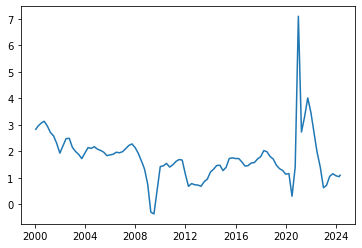

In [21]:
plt.plot(GDP_monthly)

In [82]:
observations

array([[5.75070000e+00, 5.28172666e-04, 2.77936530e+00, 1.15000000e+00],
       [5.71900000e+00, 6.49116598e-04, 2.77936530e+00, 1.15000000e+00],
       [5.42460000e+00, 4.31964582e-04, 2.94745220e+00, 1.46000000e+00],
       ...,
       [3.04582900e+00, 2.84917869e-04, 1.07922040e+00, 3.62000000e+00],
       [2.93274800e+00, 3.51902598e-04, 1.04754492e+00, 2.81000000e+00],
       [3.14952700e+00, 7.56263069e-04, 1.04754492e+00, 2.81000000e+00]])

In [22]:
%store HICP__
%store GDP__

Stored 'HICP__' (Series)
Stored 'GDP__' (Series)


In [89]:
np.var(observations)

1.9695919672806952

In [317]:
# State transition function
def state_transition_function(x, dt, K, Theta, Sigma):
    F = scipy.linalg.expm(-K * dt)
    C = Theta @ (np.eye(len(F)) - F)
    epsilon_t = [
        Theta[0] * Sigma[0, 0]**2 / (2 * K[0, 0]) * ((1 - np.exp(-K[0, 0] * dt))**2) +
        Sigma[0, 0]**2 / K[0, 0] * ((np.exp(-K[0, 0] * dt) - np.exp(-2 * K[0, 0] * dt))**2) * x[0],
        
        Theta[1] * Sigma[1, 1]**2 / (2 * K[1, 1]) * ((1 - np.exp(-K[1, 1] * dt))**2) +
        Sigma[1, 1]**2 / K[1, 1] * ((np.exp(-K[1, 1] * dt) - np.exp(-2 * K[1, 1] * dt))**2) * x[1],
        
        Theta[2] * Sigma[2, 2]**2 / (2 * K[2, 2]) * ((1 - np.exp(-K[2, 2] * dt))**2) +
        Sigma[2, 2]**2 / K[2, 2] * ((np.exp(-K[2, 2] * dt) - np.exp(-2 * K[2, 2] * dt))**2) * x[2],
        
        Sigma[3, 3]**2 / (2 * K[3, 3]) * (1 - np.exp(-2 * K[3, 3] * dt)),
        
        Sigma[4, 4]**2 / (2 * K[4, 4]) * (1 - np.exp(-2 * K[4, 4] * dt))
    ]
    e_t = np.random.normal(0, np.abs(epsilon_t))
    #Xi = np.eye(5) * np.array([np.sqrt(abs(x[1])), np.sqrt(abs(x[1])), np.sqrt(abs(x[1])), 1, 1])
    return C + F @ x + e_t
    #return epsilon_t, e_t # x, K, Theta, Sigma
    #return x + K @ (Theta - x) * dt + Sigma @ Xi @ (np.sqrt(dt) * np.random.normal(size=len(x)))

# Measurement function
def measurement_function(x, a_tau, b_tau):
    return np.array([a_tau + b_tau*x[1], x[2], x[3], x[4]])

# Log-likelihood calculation with jitter for stability
def run_ukf(observations, K, Theta, Sigma, X0, P0, Q, R, a_tau, b_tau, dt=1/12):
    
    points = MerweScaledSigmaPoints(n=5, alpha=0.1, beta=2., kappa=0)
    ukf = UKF(dim_x=5, dim_z=observations.shape[1], fx=lambda x, dt: state_transition_function(x, dt, K, Theta, Sigma),
              hx=lambda x: measurement_function(x, a_tau, b_tau), dt=dt, points=points)
    ukf.x = X0
    ukf.P = P0
    ukf.Q = Q
    ukf.R = R

    log_likelihood = 0
    jitter = 1e-6
    for z in observations:
        ukf.predict()
        try:
            ukf.update(z)
        except np.linalg.LinAlgError as e:
            print(f"LinAlgError during UKF update: {e}")
            return np.inf
        except ValueError as e:
            print(f"ValueError during UKF update: {e}")
            return np.inf
        S_stable = ukf.S + np.eye(ukf.S.shape[0]) * jitter
        log_likelihood += np.sum(np.log(np.diag(S_stable))) + ukf.y.T @ np.linalg.inv(S_stable) @ ukf.y

    return -log_likelihood

# Objective function for optimization
def objective_function(params, observations, X0, P0, Q, R, a_tau, b_tau):
    K = params[:25].reshape((5, 5))
    Theta = params[25:30]
    Sigma = np.diag(params[30:35])
    return run_ukf(observations, K, Theta, Sigma, X0, P0, Q, R, a_tau, b_tau)

In [154]:
# Constraints to ensure specific elements are zero
def constraint_function(params):
    K = params[:25].reshape((5, 5))
    Theta = params[25:30]
    # First row, except first element, of K should be zero
    K_first_row_constraints = K[0, 1:]
    # Second and third elements of Theta should be zero
    Theta_constraints = Theta[1:3]
    return np.concatenate([K_first_row_constraints, Theta_constraints])

In [318]:
# Initial state and covariance
X0 = np.array([0.02, 0.03, 0.01, 0.015, 0.025])
P0 = np.eye(5) * 0.1
Q = np.eye(5) * [Sigma[0][0]**2 / (2 * K[0][0]) * (1 - np.exp(-2 * K[0][0] * dt)),
                 Sigma[1][1]**2 / (2 * K[1][1]) * (1 - np.exp(-2 * K[1][1] * dt)),
                 Sigma[2][2]**2 / (2 * K[2][2]) * (1 - np.exp(-2 * K[2][2] * dt)),
                 Sigma[-2][-2]**2 / (2 * K[-2][-2]) * (1 - np.exp(-2 * K[-2][-2] * dt)), 
                 Sigma[-1][-1]**2 / (2 * K[-1][-1]) * (1 - np.exp(-2 * K[-1][-1]* dt))]
R = np.eye(4) * [np.var(EA_10Y_mth_yields__.values), np.var(EA_vol_std__.values), np.var(GDP_monthly.values), np.var(HICP_monthly.values)]  # Adjusted to match observation dimensions

# Perturb initial parameters slightly for optimization
initial_params = np.hstack([
    K.flatten() + np.random.normal(0, 0.01, K.flatten().shape),
    Theta + np.random.normal(0, 0.01, Theta.shape),
    np.diag(Sigma) + np.random.normal(0, 0.01, np.diag(Sigma).shape)
])

observations_cut = observations[0:10]

bounds = [(-1, 1)] * 25 + [(-1, 1)] * 5 + [(1e-6, 1)] * 5

a_tau = A_tau[-1]/tau
b_tau = B_tau[-1]/tau

# Optimize parameters
result = minimize(objective_function, initial_params, args=(observations_cut, X0, P0, Q, R, a_tau, b_tau), method='L-BFGS-B', bounds=bounds)

# Extract estimated parameters
if result.success:
    estimated_params = result.x
    K_estimated = estimated_params[:25].reshape((5, 5))
    Theta_estimated = estimated_params[25:30]
    Sigma_estimated = np.diag(estimated_params[30:35])

    print("Estimated K:", K_estimated)
    print("Estimated Theta:", Theta_estimated)
    print("Estimated Sigma:", Sigma_estimated)
else:
    print("Optimization failed:", result.message)

Estimated K: [[ 0.24913973  0.0151126  -0.00209215  0.00200529 -0.01025627]
 [ 0.06413621  0.13910135  0.09222621 -0.11778434 -0.03986301]
 [ 0.03761363 -0.01801255  0.31787544 -0.10856321 -0.1628305 ]
 [ 0.0061384   0.06137723  0.10309061  0.40066692  0.03528733]
 [-0.00418786  0.02555506  0.15527139  0.03335385  0.62414609]]
Estimated Theta: [ 0.00090198 -0.00908728 -0.00111881  0.03400123  0.04173602]
Estimated Sigma: [[0.06480854 0.         0.         0.         0.        ]
 [0.         0.22693641 0.         0.         0.        ]
 [0.         0.         0.1186896  0.         0.        ]
 [0.         0.         0.         0.00742074 0.        ]
 [0.         0.         0.         0.         0.00183056]]


In [316]:
np.random.normal(0,np.abs(Q))

array([[-1.18321915e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.54060250e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.89546556e-03,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.30491495e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.91139138e-05]])

In [298]:
state_transition_function(X0, 1/12, K, Theta, Sigma)

array([0.01968666, 0.02981927, 0.01062666, 0.01500019, 0.02485266])

In [ ]:
EA_10Y_mth_yields__
EA_vol_std__
HICP__
GDP__

Comparison

In [ ]:

from scipy.interpolate import interp1d

# Function to simulate state variables using estimated parameters
def simulate_state_variables(K, Theta, Sigma, X0, steps, dt=1/12):
    X = np.zeros((steps, len(X0)))
    X[0] = X0
    for t in range(1, steps):
        X[t] = state_transition_function(X[t-1], dt, K, Theta, Sigma)
    return X

# Simulate state variables using estimated parameters
steps = len(observations)
X_simulated = simulate_state_variables(K_estimated, Theta_estimated, Sigma_estimated, X0, steps)

# Generate predicted observations
Y_predicted = np.array([measurement_function(X_simulated[t]) for t in range(steps)])

# Interpolate the predicted observations to match the length of actual data
def interpolate_to_match_length(predicted, actual):
    x_pred = np.arange(len(predicted))
    x_actual = np.arange(len(actual))
    interpolator = interp1d(x_pred, predicted, kind='linear', fill_value="extrapolate")
    return interpolator(x_actual)

# Interpolate the predicted observations to match the actual data
Y_predicted_yields = interpolate_to_match_length(Y_predicted[:, 0], EA_10Y_mth_yields__.values)
Y_predicted_vol = interpolate_to_match_length(Y_predicted[:, 1], EA_vol_std__.values)
Y_predicted_gdp = interpolate_to_match_length(Y_predicted[:, 2], GDP_monthly.values)
Y_predicted_hicp = interpolate_to_match_length(Y_predicted[:, 3], HICP_monthly.values)

# Plot the actual data against the predicted data
plt.figure(figsize=(15, 10))

# Plot yields
plt.subplot(2, 2, 1)
plt.plot(EA_10Y_mth_yields__.index, EA_10Y_mth_yields__.values, label='Actual 10Y Yields')
plt.plot(EA_10Y_mth_yields__.index, Y_predicted_yields, label='Predicted 10Y Yields')
plt.title('10-Year Yields')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()

# Plot yield volatilities
plt.subplot(2, 2, 2)
plt.plot(EA_vol_std__.index, EA_vol_std__.values, label='Actual Yield Volatilities')
plt.plot(EA_vol_std__.index, Y_predicted_vol, label='Predicted Yield Volatilities')
plt.title('Yield Volatilities')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

# Plot GDP growth
plt.subplot(2, 2, 3)
plt.plot(GDP_monthly.index, GDP_monthly.values, label='Actual GDP Growth')
plt.plot(GDP_monthly.index, Y_predicted_gdp, label='Predicted GDP Growth')
plt.title('GDP Growth')
plt.xlabel('Date')
plt.ylabel('Growth')
plt.legend()

# Plot HICP inflation
plt.subplot(2, 2, 4)
plt.plot(HICP_monthly.index, HICP_monthly.values, label='Actual HICP Inflation')
plt.plot(HICP_monthly.index, Y_predicted_hicp, label='Predicted HICP Inflation')
plt.title('HICP Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate Mean Squared Error (MSE) for each observation type
mse_yields = np.mean((EA_10Y_mth_yields__.values - Y_predicted_yields)**2)
mse_volatilities = np.mean((EA_vol_std__.values - Y_predicted_vol)**2)
mse_gdp = np.mean((GDP_monthly.values - Y_predicted_gdp)**2)
mse_hicp = np.mean((HICP_monthly.values - Y_predicted_hicp)**2)

print(f"MSE for Yields: {mse_yields}")
print(f"MSE for Volatilities: {mse_volatilities}")
print(f"MSE for GDP Growth: {mse_gdp}")
print(f"MSE for HICP Inflation: {mse_hicp}")


In [ ]:
EA_10Y_mth_yields__

---

### Parameter Estimation General?

In [ ]:
# Define the state transition function
def state_transition_function(X, dt, K, Theta, Sigma):
    # Ensure no negative values for sqrt
    sqrt_Xi_t_values = [max(0, X[i]) for i in range(3)] + [1] * 2
    Xi_t = np.diag(np.sqrt(sqrt_Xi_t_values))

    # Generate random noise vector
    dZ_t = np.random.normal(size=5)

    # Compute the state change
    dX_t = K @ (Theta - X) * dt + Sigma @ Xi_t @ dZ_t

    # Ensure no NaN or inf values
    dX_t = np.nan_to_num(dX_t, nan=0.0, posinf=0.0, neginf=0.0)

    return X + dX_t * dt

# Define the measurement function
def measurement_function(X):
    a_tau = np.array([0.1] * 5)  # Example values
    b_tau = np.eye(5)  # Example values
    return a_tau + b_tau @ X


In [ ]:
def run_ukf(observations, K, Theta, Sigma, X0, P0, Q, R, dt=1/12):
    # Define the sigma points
    points = MerweScaledSigmaPoints(n=5, alpha=0.1, beta=2., kappa=0)

    # Initialize the UKF
    ukf = UKF(dim_x=5, dim_z=5, fx=lambda x, dt: state_transition_function(x, dt, K, Theta, Sigma),
              hx=measurement_function, dt=dt, points=points)
    ukf.x = X0
    ukf.P = P0
    ukf.Q = Q
    ukf.R = R

    log_likelihood = 0
    jitter = 1e-6  # Small value to ensure numerical stability
    for z in observations:
        ukf.predict()
        ukf.update(z)
        S_stable = ukf.S + np.eye(ukf.S.shape[0]) * jitter  # Add jitter for numerical stability
        log_likelihood += np.sum(np.log(np.diag(S_stable))) + ukf.y.T @ np.linalg.inv(S_stable) @ ukf.y

    return -log_likelihood  # We want to minimize negative log-likelihood

def objective_function(params, observations, X0, P0, Q, R):
    K = params[:25].reshape((5, 5))
    Theta = params[25:30]
    Sigma = np.diag(params[30:35])
    return run_ukf(observations, K, Theta, Sigma, X0, P0, Q, R)


In [ ]:
K_initial = np.array([
    [0.2445, 0, 0, 0, 0], 
    [0.0823, 0.1356, 0.0789, -0.1207, -0.0257], 
    [0.0378, -0.0090, 0.3177, -0.1012, -0.1533], 
    [-0.0019, 0.0542, 0.0988, 0.4265, 0.0427], 
    [0.0088, 0.0312, 0.1609, 0.0332, 0.6246]
]).flatten()

Theta_initial = np.array([0.0038, 0, 0, 0.0214, 0.0257])

Sigma_initial = np.array([
    0.0635, 0.2373, 0.1226, 0.0101, 0.0099
])

# Perturb the initial parameters slightly to ensure they are not stuck at local minima
initial_params = np.hstack([
    K_initial + np.random.normal(0, 0.01, K_initial.shape),
    Theta_initial + np.random.normal(0, 0.01, Theta_initial.shape),
    Sigma_initial + np.random.normal(0, 0.01, Sigma_initial.shape)
])


# Example observations (yields, GDP growth, inflation)
observations = np.array([ea10yr_daily_yeilds[0:100], GDP[0:100], HICP[0:100]])
# observations = np.array([
#     [0.05, 0.03, 0.02, 0.015, 0.025],
#     # Add more observations here
# ])

# Define initial state and covariance
X0 = np.array([0, 0, 0, 0, 0])
P0 = np.eye(5) * 0.1
Q = np.eye(5) * 0.01
R = np.eye(5) * 0.05

# Optimize parameters
result = minimize(objective_function, initial_params, args=(observations, X0, P0, Q, R), method='L-BFGS-B')

# Extract estimated parameters
estimated_params = result.x
K_estimated = estimated_params[:25].reshape((5, 5))
Theta_estimated = estimated_params[25:30]
Sigma_estimated = np.diag(estimated_params[30:35])

print("Estimated K:", K_estimated)
print("Estimated Theta:", Theta_estimated)
print("Estimated Sigma:", Sigma_estimated)

In [ ]:
# from scipy.optimize import minimize

# # Initial guesses for parameters
# initial_params = np.hstack([
#     K,  # K matrix flattened
#     Theta,   # Theta vector
#     Sigma    # Sigma diagonal elements
# ])

# # Example observations (yields, GDP growth, inflation)
# observations = ea10yr_daily_yeilds
# # observations = np.array([
# #     [0.05, 0.03, 0.02, 0.015, 0.025],
# #     # Add more observations here
# # ])

# # Define initial state and covariance
# X0 = np.array([0.02, 0.03, 0.01, 0.015, 0.025])
# P0 = np.eye(5) * 0.1
# Q = np.eye(5) * 0.01
# R = np.eye(5) * 0.05

# # Optimize parameters
# result = minimize(objective_function, initial_params, args=(observations, X0, P0, Q, R), method='L-BFGS-B')

# # Extract estimated parameters
# estimated_params = result.x
# K_estimated = estimated_params[:25].reshape((5, 5))
# Theta_estimated = estimated_params[25:30]
# Sigma_estimated = np.diag(estimated_params[30:35])

# print("Estimated K:", K_estimated)
# print("Estimated Theta:", Theta_estimated)
# print("Estimated Sigma:", Sigma_estimated)


---

## OU Params Package Testing

In [ ]:
from ouparams import ouparams
mu, sigma, theta = ouparams.find(EA_10Y_mth_yields)
print(mu, sigma, theta)

In [ ]:
N = 12 * 24  # time steps
paths = 200  # number of paths
T = 10
T_vec, dt = np.linspace(0, T, N, retstep=True)

kappa = 0.0036236564940852290998
std_asy = np.sqrt(theta * sigma**2 / (2 * kappa))  # asymptotic standard deviation

X0 = 2.891449784
X = np.zeros((N, paths))
X[0, :] = X0
W = ss.norm.rvs(loc=0, scale=np.sqrt(dt), size=(N - 1, paths))

# Uncomment for Euler Maruyama
for t in range(0,N-1):
   X[t + 1, :] = X[t, :] + kappa*(theta - X[t, :])*dt + sigma * np.sqrt(dt) * W[t, :]

X_T = X[-1, :]  # values of X at time T
X_1 = X[:, 0]  # a single path
plt.plot(X_1)

In [ ]:
XX = EA_10Y_mth_yields[:-1]
YY = EA_10Y_mth_yields[1:]
beta, alpha, _, _, _ = ss.linregress(XX, YY)  # OLS
kappa_ols = -np.log(beta) / (1/12)
theta_ols = alpha / (1 - beta)
res = YY - beta * XX - alpha  # residuals
std_resid = np.std(res, ddof=2)
sig_ols = std_resid * np.sqrt(2 * kappa_ols / (1 - beta**2))

print("OLS theta = ", theta_ols)
print("OLS kappa = ", kappa_ols)
print("OLS sigma = ", sig_ols)

In [ ]:
Sx = np.sum(XX)
Sy = np.sum(YY)
Sxx = XX @ XX
Sxy = XX @ YY
Syy = YY @ YY

theta_mle = (Sy * Sxx - Sx * Sxy) / (N * (Sxx - Sxy) - (Sx**2 - Sx * Sy))
kappa_mle = -(1 / dt) * np.log(
    (Sxy - theta_mle * Sx - theta_mle * Sy + N * theta_mle**2) / (Sxx - 2 * theta_mle * Sx + N * theta_mle**2)
)
sigma2_hat = (
    Syy
    - 2 * np.exp(-kappa_mle * dt) * Sxy
    + np.exp(-2 * kappa_mle * dt) * Sxx
    - 2 * theta_mle * (1 - np.exp(-kappa_mle * dt)) * (Sy - np.exp(-kappa_mle * dt) * Sx)
    + N * theta_mle**2 * (1 - np.exp(-kappa_mle * dt)) ** 2
) / N
sigma_mle = np.sqrt(sigma2_hat * 2 * kappa_mle / (1 - np.exp(-2 * kappa_mle * dt)))

In [ ]:
print("theta MLE = ", theta_mle)
print("kappa MLE = ", kappa_mle)
print("sigma MLE = ", sigma_mle)

In [1]:
%history -g -f "history2.txt"